In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDC.csv')

In [ ]:
data.tail()

,#,hydrophobicity_PRAM900101.G1,hydrophobicity_PRAM900101.G2,hydrophobicity_PRAM900101.G3,hydrophobicity_ARGP820101.G1,hydrophobicity_ARGP820101.G2,hydrophobicity_ARGP820101.G3,hydrophobicity_ZIMJ680101.G1,hydrophobicity_ZIMJ680101.G2,hydrophobicity_ZIMJ680101.G3,hydrophobicity_PONP930101.G1,hydrophobicity_PONP930101.G2,hydrophobicity_PONP930101.G3,hydrophobicity_CASG920101.G1,hydrophobicity_CASG920101.G2,hydrophobicity_CASG920101.G3,hydrophobicity_ENGD860101.G1,hydrophobicity_ENGD860101.G2,hydrophobicity_ENGD860101.G3,hydrophobicity_FASG890101.G1,hydrophobicity_FASG890101.G2,hydrophobicity_FASG890101.G3,normwaalsvolume.G1,normwaalsvolume.G2,normwaalsvolume.G3,polarity.G1,polarity.G2,polarity.G3,polarizability.G1,polarizability.G2,polarizability.G3,charge.G1,charge.G2,charge.G3,secondarystruct.G1,secondarystruct.G2,secondarystruct.G3,solventaccess.G1,solventaccess.G2,solventaccess.G3
14318,d3s2ra|g,0.375000,0.296875,0.328125,0.406250,0.359375,0.234375,0.484375,0.296875,0.218750,0.500000,0.156250,0.343750,0.625000,0.234375,0.140625,0.468750,0.218750,0.312500,0.343750,0.281250,0.375000,0.390625,0.390625,0.218750,0.343750,0.265625,0.390625,0.265625,0.515625,0.218750,0.156250,0.734375,0.109375,0.328125,0.312500,0.359375,0.421875,0.375000,0.203125
14319,d4c3hd|g,0.314607,0.404494,0.280899,0.505618,0.247191,0.247191,0.629213,0.123596,0.247191,0.550562,0.168539,0.280899,0.595506,0.280899,0.123596,0.370787,0.348315,0.280899,0.348315,0.247191,0.404494,0.460674,0.415730,0.123596,0.280899,0.382022,0.337079,0.426966,0.449438,0.123596,0.056180,0.820225,0.123596,0.382022,0.292135,0.325843,0.393258,0.314607,0.292135
14320,d3jb9e|g,0.381944,0.326389,0.291667,0.375000,0.347222,0.277778,0.520833,0.215278,0.263889,0.451389,0.208333,0.340278,0.597222,0.229167,0.173611,0.493056,0.229167,0.277778,0.395833,0.201389,0.402778,0.381944,0.305556,0.312500,0.340278,0.256944,0.402778,0.270833,0.416667,0.312500,0.180556,0.701389,0.118056,0.458333,0.305556,0.236111,0.368056,0.381944,0.250000
14321,d5lj3n2|g,0.374101,0.258993,0.366906,0.388489,0.323741,0.287770,0.482014,0.237410,0.280576,0.489209,0.136691,0.374101,0.568345,0.237410,0.194245,0.453237,0.187050,0.359712,0.345324,0.223022,0.431655,0.345324,0.431655,0.223022,0.374101,0.230216,0.395683,0.230216,0.546763,0.223022,0.129496,0.755396,0.115108,0.431655,0.294964,0.273381,0.395683,0.374101,0.230216
14322,d5syba|g,0.322222,0.333333,0.344444,0.344444,0.422222,0.233333,0.455556,0.311111,0.233333,0.366667,0.233333,0.400000,0.533333,0.244444,0.222222,0.444444,0.211111,0.344444,0.344444,0.188889,0.466667,0.466667,0.300000,0.233333,0.400000,0.255556,0.344444,0.288889,0.477778,0.233333,0.144444,0.733333,0.122222,0.333333,0.377778,0.288889,0.488889,0.322222,0.188889


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14323 entries, 0 to 14322
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    #                            14323 non-null  object 
 1   hydrophobicity_PRAM900101.G1  14323 non-null  float64
 2   hydrophobicity_PRAM900101.G2  14323 non-null  float64
 3   hydrophobicity_PRAM900101.G3  14323 non-null  float64
 4   hydrophobicity_ARGP820101.G1  14323 non-null  float64
 5   hydrophobicity_ARGP820101.G2  14323 non-null  float64
 6   hydrophobicity_ARGP820101.G3  14323 non-null  float64
 7   hydrophobicity_ZIMJ680101.G1  14323 non-null  float64
 8   hydrophobicity_ZIMJ680101.G2  14323 non-null  float64
 9   hydrophobicity_ZIMJ680101.G3  14323 non-null  float64
 10  hydrophobicity_PONP930101.G1  14323 non-null  float64
 11  hydrophobicity_PONP930101.G2  14323 non-null  float64
 12  hydrophobicity_PONP930101.G3  14323 non-null  float64
 13  h

In [ ]:
data[['d1','class']]=data.iloc[:,0].str.split('|', n=1, expand=True)
data = data.drop(data.columns[[0]],axis = 1)
data=data.drop(['d1'], axis=1)

In [ ]:
data.tail()

,hydrophobicity_PRAM900101.G1,hydrophobicity_PRAM900101.G2,hydrophobicity_PRAM900101.G3,hydrophobicity_ARGP820101.G1,hydrophobicity_ARGP820101.G2,hydrophobicity_ARGP820101.G3,hydrophobicity_ZIMJ680101.G1,hydrophobicity_ZIMJ680101.G2,hydrophobicity_ZIMJ680101.G3,hydrophobicity_PONP930101.G1,hydrophobicity_PONP930101.G2,hydrophobicity_PONP930101.G3,hydrophobicity_CASG920101.G1,hydrophobicity_CASG920101.G2,hydrophobicity_CASG920101.G3,hydrophobicity_ENGD860101.G1,hydrophobicity_ENGD860101.G2,hydrophobicity_ENGD860101.G3,hydrophobicity_FASG890101.G1,hydrophobicity_FASG890101.G2,hydrophobicity_FASG890101.G3,normwaalsvolume.G1,normwaalsvolume.G2,normwaalsvolume.G3,polarity.G1,polarity.G2,polarity.G3,polarizability.G1,polarizability.G2,polarizability.G3,charge.G1,charge.G2,charge.G3,secondarystruct.G1,secondarystruct.G2,secondarystruct.G3,solventaccess.G1,solventaccess.G2,solventaccess.G3,class
14318,0.375000,0.296875,0.328125,0.406250,0.359375,0.234375,0.484375,0.296875,0.218750,0.500000,0.156250,0.343750,0.625000,0.234375,0.140625,0.468750,0.218750,0.312500,0.343750,0.281250,0.375000,0.390625,0.390625,0.218750,0.343750,0.265625,0.390625,0.265625,0.515625,0.218750,0.156250,0.734375,0.109375,0.328125,0.312500,0.359375,0.421875,0.375000,0.203125,g
14319,0.314607,0.404494,0.280899,0.505618,0.247191,0.247191,0.629213,0.123596,0.247191,0.550562,0.168539,0.280899,0.595506,0.280899,0.123596,0.370787,0.348315,0.280899,0.348315,0.247191,0.404494,0.460674,0.415730,0.123596,0.280899,0.382022,0.337079,0.426966,0.449438,0.123596,0.056180,0.820225,0.123596,0.382022,0.292135,0.325843,0.393258,0.314607,0.292135,g
14320,0.381944,0.326389,0.291667,0.375000,0.347222,0.277778,0.520833,0.215278,0.263889,0.451389,0.208333,0.340278,0.597222,0.229167,0.173611,0.493056,0.229167,0.277778,0.395833,0.201389,0.402778,0.381944,0.305556,0.312500,0.340278,0.256944,0.402778,0.270833,0.416667,0.312500,0.180556,0.701389,0.118056,0.458333,0.305556,0.236111,0.368056,0.381944,0.250000,g
14321,0.374101,0.258993,0.366906,0.388489,0.323741,0.287770,0.482014,0.237410,0.280576,0.489209,0.136691,0.374101,0.568345,0.237410,0.194245,0.453237,0.187050,0.359712,0.345324,0.223022,0.431655,0.345324,0.431655,0.223022,0.374101,0.230216,0.395683,0.230216,0.546763,0.223022,0.129496,0.755396,0.115108,0.431655,0.294964,0.273381,0.395683,0.374101,0.230216,g
14322,0.322222,0.333333,0.344444,0.344444,0.422222,0.233333,0.455556,0.311111,0.233333,0.366667,0.233333,0.400000,0.533333,0.244444,0.222222,0.444444,0.211111,0.344444,0.344444,0.188889,0.466667,0.466667,0.300000,0.233333,0.400000,0.255556,0.344444,0.288889,0.477778,0.233333,0.144444,0.733333,0.122222,0.333333,0.377778,0.288889,0.488889,0.322222,0.188889,g


In [ ]:
X= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

print(X)
print(y)

[[0.24137931 0.45689655 0.30172414 ... 0.56896552 0.24137931 0.18965517]
 [0.23622047 0.43307087 0.33070866 ... 0.51968504 0.23622047 0.24409449]
 [0.34126984 0.37301587 0.28571429 ... 0.4047619  0.34126984 0.25396825]
 ...
 [0.38194444 0.32638889 0.29166667 ... 0.36805556 0.38194444 0.25      ]
 [0.37410072 0.25899281 0.36690647 ... 0.39568345 0.37410072 0.23021583]
 [0.32222222 0.33333333 0.34444444 ... 0.48888889 0.32222222 0.18888889]]
['a' 'a' 'a' ... 'g' 'g' 'g']


In [ ]:
le = LabelEncoder()
y= le.fit_transform(y) 
print(y)

[0 0 0 ... 6 6 6]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

In [ ]:
model=RandomForestClassifier(n_estimators=200)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

In [ ]:
print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

Confusion matrix: 
 [[422  44 144 164   0   0   1]
 [ 32 508 156 164   0   0   5]
 [ 73 105 899 161   0   0   1]
 [144 172 399 310   0   0   8]
 [  8   8  58   9   0   0   0]
 [  9  11  10   8   0  45   0]
 [ 14  28   6  20   0   2 149]]


Accuracy: 0.5429369327437747


Precision: [0.6011396  0.57990868 0.53767943 0.3708134  0.         0.95744681
 0.90853659]

Recall: [0.54451613 0.58728324 0.72558515 0.30009681 0.         0.54216867
 0.6803653 ]


F1 score: [0.57142857 0.58357266 0.61765716 0.3317282  0.         0.69230769
 0.77806789]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Combined

[[0.18965517 0.00862069 0.02586207 ... 0.         0.         0.        ]
 [0.11023622 0.         0.04724409 ... 0.         0.         0.        ]
 [0.1031746  0.00793651 0.07936508 ... 0.         0.         0.        ]
 ...
 [0.04166667 0.06944444 0.05555556 ... 0.         0.         0.        ]
 [0.03597122 0.0647482  0.05035971 ... 0.         0.         0.        ]
 [0.04444444 0.13333333 0.07777778 ... 0.         0.         0.        ]]
['a' 'a' 'a' ... 'g' 'g' 'g']
[0 0 0 ... 6 6 6]
Confusion matrix: 
 [[417  48 145 158   0   0   7]
 [ 31 519 116 198   0   0   1]
 [ 44  66 973 155   0   0   1]
 [140 172 347 368   0   0   6]
 [  6   5  67   5   0   0   0]
 [  8  12  14   5   0  44   0]
 [ 10  16   0  12   0   0 181]]


Accuracy: 0.582266697696067


Precision: [0.63567073 0.61933174 0.58543923 0.40843507 0.         1.
 0.92346939]

Recall: [0.53806452 0.6        0.78531073 0.35624395 0.         0.53012048
 0.82648402]


F1 score: [0.58280922 0.60951262 0.67080317 0.38055843 0.       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


          A         C         D  ...  g7.g7.g5  g7.g7.g6  g7.g7.g7
A  1.000000 -0.193020 -0.050675  ... -0.047559 -0.044234 -0.010028
C -0.193020  1.000000 -0.096767  ...  0.236394  0.190081  0.068659
D -0.050675 -0.096767  1.000000  ... -0.028614 -0.000691 -0.001749
E -0.131445 -0.130778 -0.101939  ... -0.051474 -0.006658  0.006875
F -0.187293 -0.079412  0.022773  ... -0.011337 -0.022462 -0.010123

[5 rows x 446 columns]
Selected Columns :- 

 Index(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
       ...
       'g7.g6.g5', 'g7.g6.g6', 'g7.g6.g7', 'g7.g7.g1', 'g7.g7.g2', 'g7.g7.g3',
       'g7.g7.g4', 'g7.g7.g5', 'g7.g7.g6', 'g7.g7.g7'],
      dtype='object', length=435)


New Data :- 

               A         C         D  ...  g7.g7.g5  g7.g7.g6  g7.g7.g7
0      0.189655  0.008621  0.025862  ...       0.0       0.0       0.0
1      0.110236  0.000000  0.047244  ...       0.0       0.0       0.0
2      0.103175  0.007937  0.079365  ...       0.0       0.0       0.0
3      0.1171

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


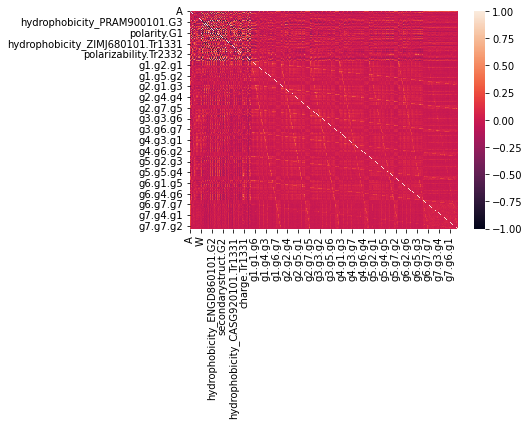

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_AAC.csv')
df1 = df1.drop(df1.columns[[0]],axis = 1)

df2 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDC.csv')
df2 = df2.drop(df2.columns[[0]],axis = 1)

df3 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDT.csv')
df3 = df3.drop(df3.columns[[0]],axis = 1)

df5 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_GAAC.csv')
df5 = df5.drop(df5.columns[[0]],axis = 1)

df4 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTriad.csv')
df4.tail()
df4[['d1','class']]=df4.iloc[:,0].str.split('|', n=1, expand=True)
df4 = df4.drop(df4.columns[[0]],axis = 1)
df4=df4.drop(['d1'], axis=1)
df4.tail()

data = pd.concat([df1, df2, df3,df5, df4], axis=1)
data.tail()

X= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

print(X)
print(y)

le = LabelEncoder()
y= le.fit_transform(y) 
print(y)



X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

new_dataset = pd.DataFrame(X, columns=data.columns[0:-1])
corr = new_dataset.corr()
print(corr.head())
sb.heatmap(corr)

columns = np.full((len(new_dataset.columns),), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = new_dataset.columns[columns]
selected_columns.shape
print("Selected Columns :- \n\n",selected_columns)

new_dataset = new_dataset[selected_columns]
print("\n\nNew Data :- \n\n",new_dataset)

X=new_dataset.iloc[:,:].values
scaler = StandardScaler()
trans = scaler.fit_transform(X)
trans = pd.DataFrame(trans)

X = trans.iloc[:,:].values
print(X)



X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

[[0.18965517 0.00862069 0.02586207 ... 0.         0.         0.        ]
 [0.11023622 0.         0.04724409 ... 0.         0.         0.        ]
 [0.1031746  0.00793651 0.07936508 ... 0.         0.         0.        ]
 ...
 [0.07094595 0.         0.06756757 ... 0.         0.         0.        ]
 [0.10047847 0.00956938 0.07655502 ... 0.         0.         0.        ]
 [0.06049822 0.01779359 0.02135231 ... 0.         0.         0.        ]]
['a' 'a' 'a' ... 'c' 'c' 'c']
[0 0 0 ... 2 2 2]
Confusion matrix: 
 [[ 480   72  181]
 [  93  628  174]
 [  91  104 1056]]


Accuracy: 0.7516498784300104


Precision: [0.72289157 0.78109453 0.74840539]

Recall: [0.65484311 0.70167598 0.8441247 ]


F1 score: [0.68718683 0.73925839 0.79338843]
          A         C         D  ...  g7.g7.g5  g7.g7.g6  g7.g7.g7
A  1.000000 -0.111596 -0.055297  ... -0.028647 -0.019520  0.004036
C -0.111596  1.000000 -0.040262  ...  0.110640  0.109267  0.014920
D -0.055297 -0.040262  1.000000  ...  0.006998  0.006340  0.00

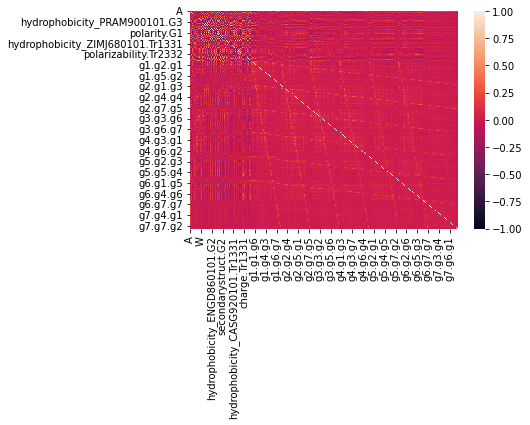

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_AAC.csv')
df1 = df1.drop(df1.columns[[0]],axis = 1)

df2 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDC.csv')
df2 = df2.drop(df2.columns[[0]],axis = 1)

df3 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTDT.csv')
df3 = df3.drop(df3.columns[[0]],axis = 1)

df5 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_GAAC.csv')
df5 = df5.drop(df5.columns[[0]],axis = 1)

df4 = pd.read_csv('/content/drive/MyDrive/Project/output_csv_iFeature/output_CTriad.csv')
df4.tail()
df4[['d1','class']]=df4.iloc[:,0].str.split('|', n=1, expand=True)
df4 = df4.drop(df4.columns[[0]],axis = 1)
df4=df4.drop(['d1'], axis=1)
df4.tail()

data = pd.concat([df1, df2, df3,df5, df4], axis=1)
data.tail()

X= data.iloc[:9595,:-1].values
y= data.iloc[:9595,-1].values

print(X)
print(y)

le = LabelEncoder()
y= le.fit_transform(y) 
print(y)



X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))

new_dataset = pd.DataFrame(X, columns=data.columns[0:-1])
corr = new_dataset.corr()
print(corr.head())
sb.heatmap(corr)

columns = np.full((len(new_dataset.columns),), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = new_dataset.columns[columns]
selected_columns.shape
print("Selected Columns :- \n\n",selected_columns)

new_dataset = new_dataset[selected_columns]
print("\n\nNew Data :- \n\n",new_dataset)

X=new_dataset.iloc[:,:].values
scaler = StandardScaler()
trans = scaler.fit_transform(X)
trans = pd.DataFrame(trans)

X = trans.iloc[:,:].values
print(X)



X_train, X_test, y_train, y_test = train_test_split(X,
y, test_size = 0.30, random_state = 5)

model = RandomForestClassifier(n_estimators=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test,y_pred))

print("\n\nAccuracy:",accuracy_score(y_test, y_pred))

print("\n\nPrecision:",precision_score(y_test, y_pred, average=None))
print("\nRecall:",recall_score(y_test, y_pred, average=None))
print("\n\nF1 score:",f1_score(y_test, y_pred, average=None))